In [46]:
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt
import math
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fftpack import fft

In [47]:
full_cpu = np.load("wetransfer-2ee104//google-cpu-full.npy")

In [4]:
full_cpu[0][:10]

array([0.25367245, 0.24440941, 0.28618598, 0.2829586 , 0.26786388,
       0.29068454, 0.22885871, 0.17440146, 0.16775258, 0.18618996])

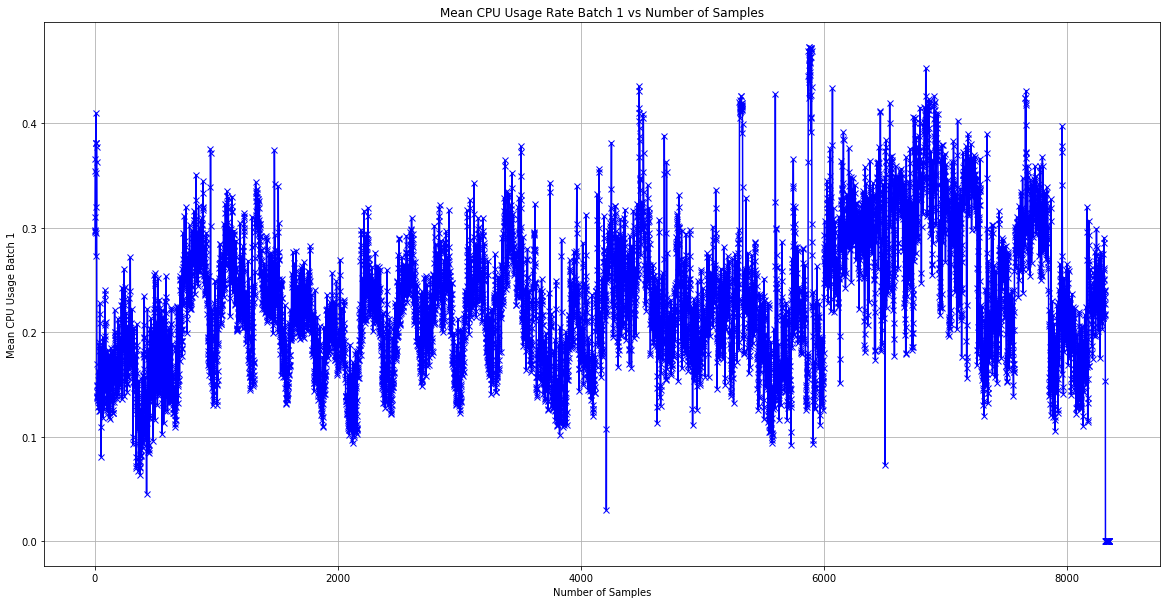

In [5]:
plt.figure(figsize=(20,10))
plt.plot(full_cpu[5], color = 'blue', marker = "x")  
plt.title("Mean CPU Usage Rate Batch 1 vs Number of Samples")  
plt.xlabel("Number of Samples")  
plt.ylabel("Mean CPU Usage Batch 1")  
plt.grid()
plt.show()

5.0


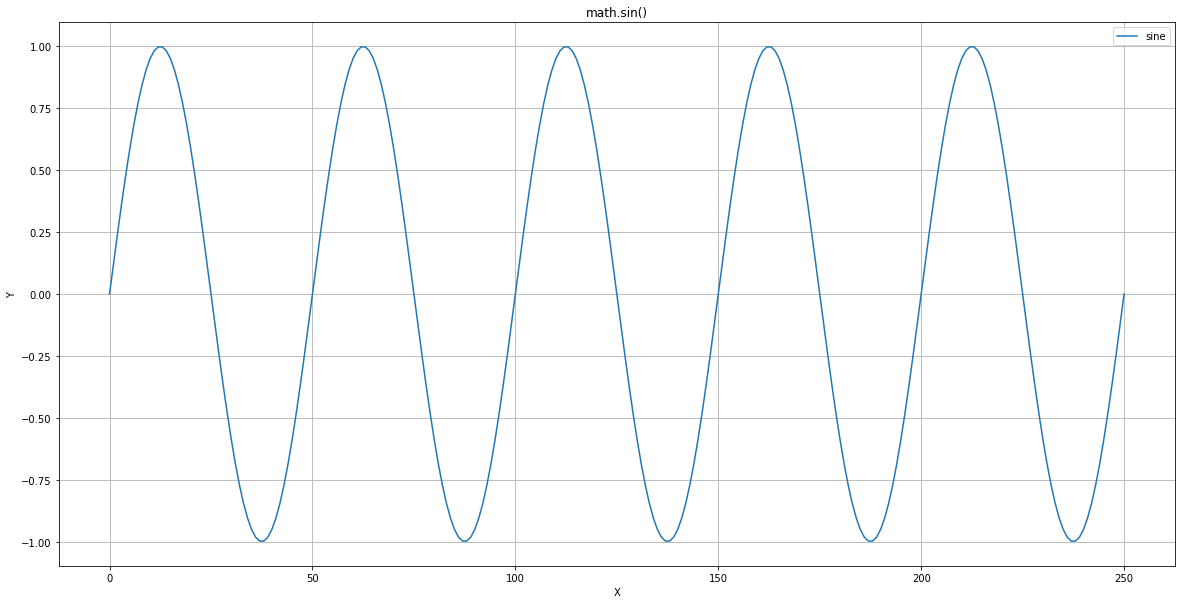

In [62]:
def sineing(x):
    return (math.sin(2*(math.pi)*x))

def cosing(x):
    return math.cos(2*(math.pi)*x)

x = np.arange(0, 5.02, 0.02).tolist()
sine_wave = list(map(sineing, x))
cosine_wave = list(map(cosing, x))
print(x[-1])
#sine_wave = np.concatenate((sine_wave,x), axis = None)
#x = np.arange(0, 10, 0.02).tolist()

plt.figure(figsize=(20,10))
plt.plot(sine_wave, label = "sine")  
#plt.plot(x,cosine_wave, label = "cosine")  

plt.title("math.sin()")  
plt.xlabel("X")  
plt.ylabel("Y")  
plt.legend()
plt.grid()
plt.show()

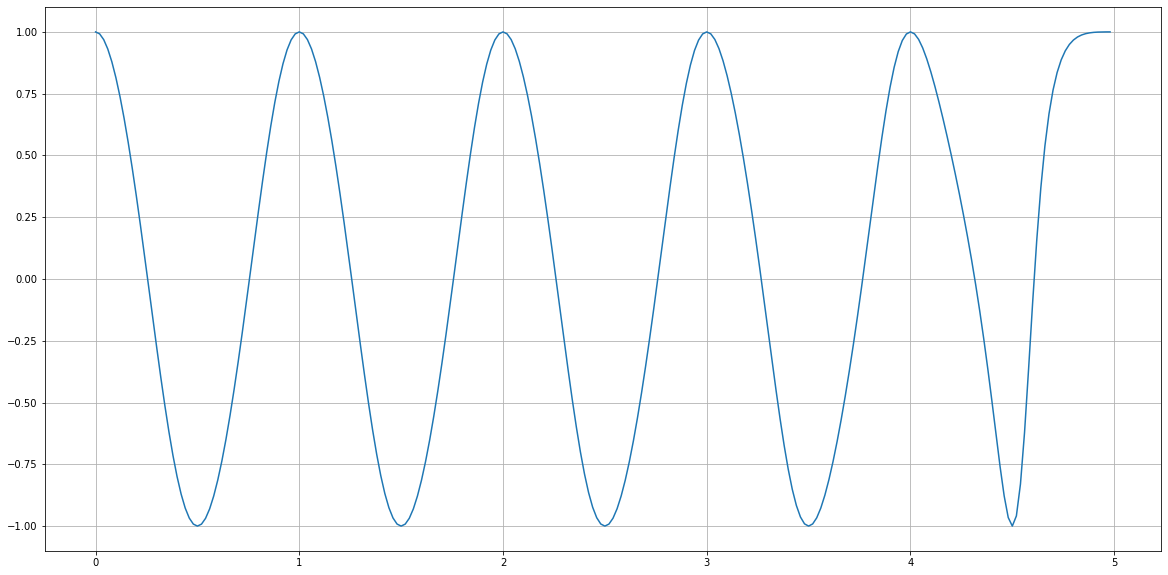

In [63]:
#aucorrelation function plot
sine_acf = [pd.Series(sine_wave).autocorr(n) for n in range(len(x))]
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(x, sine_acf)

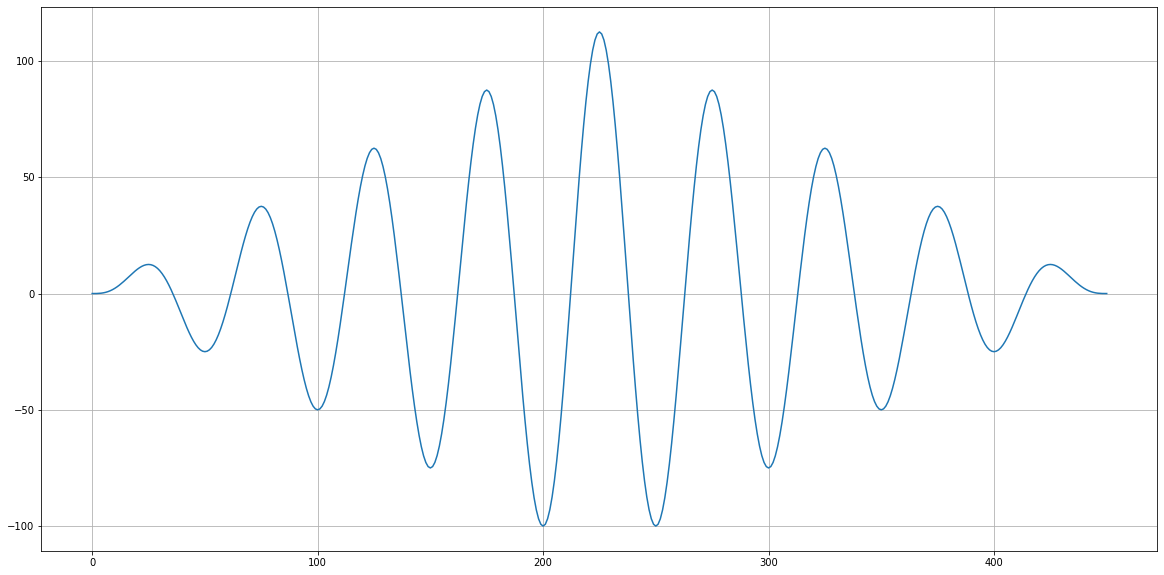

In [52]:
conv = np.convolve(sine_wave, sine_wave, mode = "full")
plt.figure(figsize=(20,10))
plt.plot(conv)    
plt.grid()
plt.show()

In [54]:
covariance = np.cov(sine_wave, cosine_wave)
covariance

array([[ 4.95031729e-01, -1.24776732e-16],
       [-1.24776732e-16,  5.04444444e-01]])

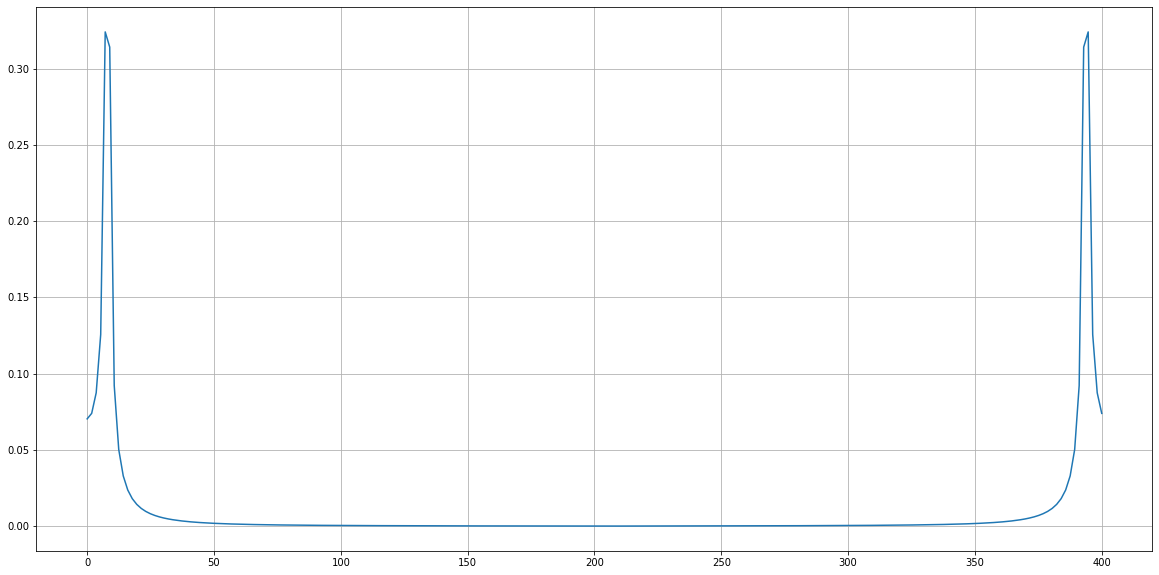

In [56]:
N = 452
T = 1.0 / 800.0

yf = fft(sine_wave)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [137]:
max(2.0/N * np.abs(yf[0:N//2]))

1.4742432730728061

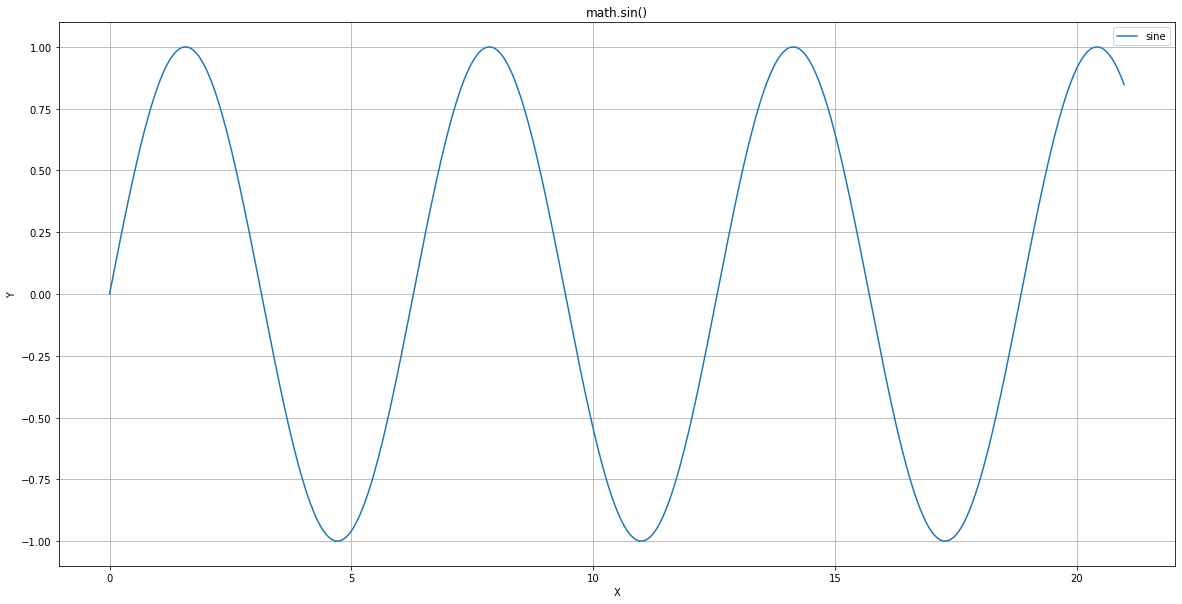

In [169]:
x = np.arange(0, 21, 0.02).tolist()
def sin_plus_x(a):
    return math.sin(a) + a

sine_offset = list(map(math.sin, x))

plt.figure(figsize=(20,10))
plt.plot(x,sine_offset, label = "sine")  

plt.title("math.sin()")  
plt.xlabel("X")  
plt.ylabel("Y")  
plt.legend()
plt.grid()
plt.show()

In [6]:
full_cpu[0][:10]

array([0.25367245, 0.24440941, 0.28618598, 0.2829586 , 0.26786388,
       0.29068454, 0.22885871, 0.17440146, 0.16775258, 0.18618996])

In [86]:
import numpy as np
def circular_autocorrelation(timeseries):
    '''performs circular autocorrelation on timeseries
    everything is done in manual
    '''
    
    variance = np.var(timeseries)
    mean = np.mean(timeseries)
    answer = []
    summing = 0
    sum_1 = 0
    
    for x in range(0,len(timeseries)):
        sum_1 = sum_1 + (timeseries[x] - mean)*(timeseries[x] - mean)
        temp = np.append(timeseries[x:], timeseries[:x])
        for y in range (0,len(temp)):
            summing = summing + (temp[y] - mean)*(timeseries[y] - mean)
            
        answer.append(summing)
        summing = 0
        
    return answer/sum_1

def circular_autocorrelation_1(timeseries):
    '''performs circular autocorrelation on timeseries
    done using built in variance and dividing the number of samples
    '''
    
    variance = np.var(timeseries)
    mean = np.mean(timeseries)
    answer = []
    summing = 0
    
    for x in range(0,len(timeseries)):
        temp = np.append(timeseries[x:], timeseries[:x])
        for y in range (0,len(temp)):
            summing = summing + (temp[y] - mean)*(timeseries[y] - mean)
        
        answer.append((summing/variance)/len(timeseries))
        summing = 0
        
    return answer

def circular_autocorrelation_2(timeseries):
    '''performs circular autocorrelation on timeseries
    done using pandas corr function
    not complete
    '''
    
    a = full_cpu[0]
    b = np.append(full_cpu[0][18:], full_cpu[0][:18])
    c = {0:a, 1:b}
    df = pd.DataFrame(c)
    df.corr()
    
    variance = np.var(timeseries)
    mean = np.mean(timeseries)
    answer = []
    summing = 0
    
    for x in range(0,len(timeseries)):
        temp = np.append(timeseries[x:], timeseries[:x])
        answer.append()
        
    return answer

#(np.correlate([1, 2, 3], [1,2,3], "full"))/np.var([1,2,3])
# cant minus the mean so offz

In [166]:
import numpy as np
def linear_autocorrelation(timeseries):
    '''performs linear autocorrelation on timeseries
    variance and mean stays constant
    '''
    
    variance = np.var(timeseries)
    mean = np.mean(timeseries)
    answer = []
    summing = 0
    
    for x in range(0,len(timeseries)):
        temp = np.append(timeseries[x:], timeseries[:x])
        for y in range (0,(len(temp)-x)):
            summing = summing + (temp[y] - mean)*(timeseries[y] - mean)
        
        answer.append((summing/variance)/len(timeseries))
        summing = 0
        
    return answer

def linear_autocorrelation_1(timeseries):
    '''performs linear autocorrelation on timeseries
    variance and mean changes with lag
    '''
    answer = []
    for x in reversed(range(1,len(timeseries) + 1)):
        df = pd.DataFrame({0: timeseries[0:x].tolist(), 1: timeseries[-x:].tolist()})
        print(df)
        answer.append(df.corr()[0][1])
        
    return answer




In [170]:
p = linear_autocorrelation(sine_offset)
p

[1.0000000000000002,
 0.9992365522615778,
 0.9980741731310067,
 0.9965140771486464,
 0.9945576373332742,
 0.992206384331674,
 0.989462005505554,
 0.9863263439562672,
 0.9828013974878136,
 0.978889317508707,
 0.9745924078732535,
 0.9699131236627734,
 0.9648540699074655,
 0.959418000249453,
 0.9536078155477268,
 0.947426562425616,
 0.940877431761535,
 0.9339637571236592,
 0.9266890131493456,
 0.9190568138700038,
 0.9110709109822323,
 0.9027351920660011,
 0.8940536787507404,
 0.8850305248301432,
 0.875670014326581,
 0.8659765595059703,
 0.8559546988440528,
 0.8456090949449623,
 0.8349445324130299,
 0.8239659156788052,
 0.8126782667802225,
 0.8010867230999642,
 0.7891965350599569,
 0.7770130637740866,
 0.7645417786601355,
 0.7517882550119881,
 0.7387581715332107,
 0.7254573078330313,
 0.7118915418858749,
 0.6980668474555071,
 0.6839892914849454,
 0.6696650314532404,
 0.6551003127003139,
 0.6403014657209398,
 0.6252749034291079,
 0.6100271183939027,
 0.5945646800480839,
 0.5788942318705819,

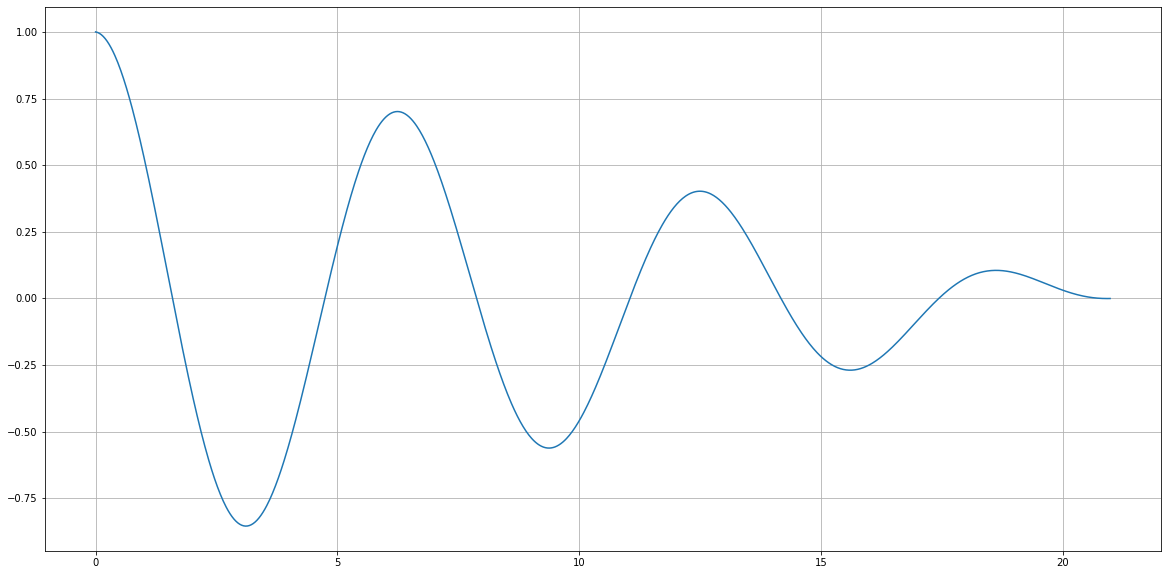

In [172]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(x,p)

[1.0, -0.6236095644623234, -0.33942211665106536, 1.0, nan]


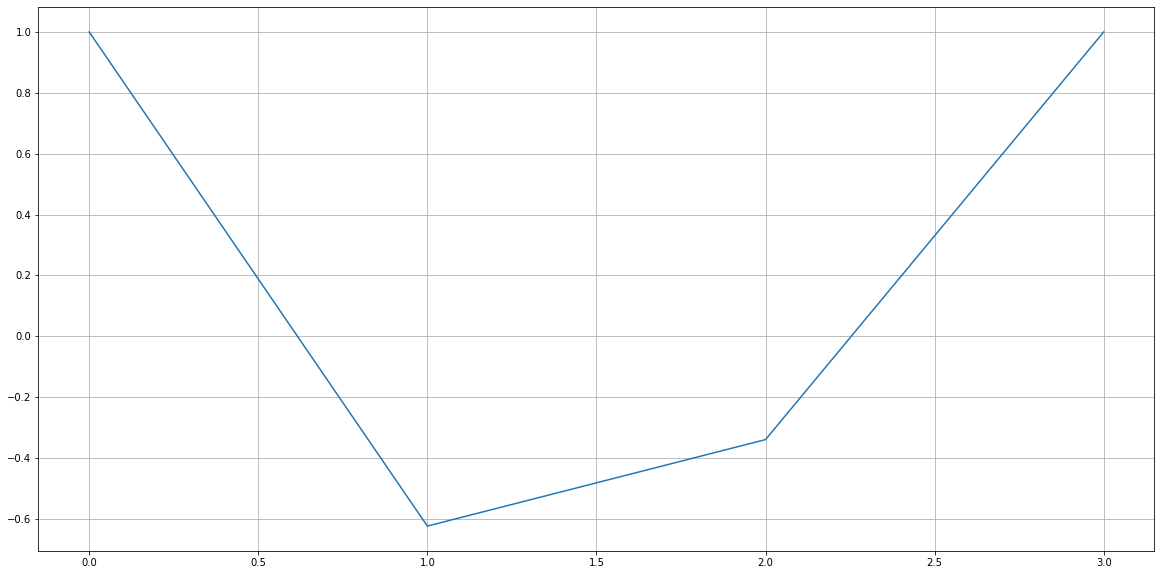

In [140]:
k = pd.Series([1,4,2,1,7])
a = [k.autocorr(n) for n in range(len(k))]
print(a)
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(a)

In [133]:
p1 = linear_autocorrelation_1(k)
p1

[nan, nan, 1.0, 1.0, 1.0]

In [81]:
p1 == p

False

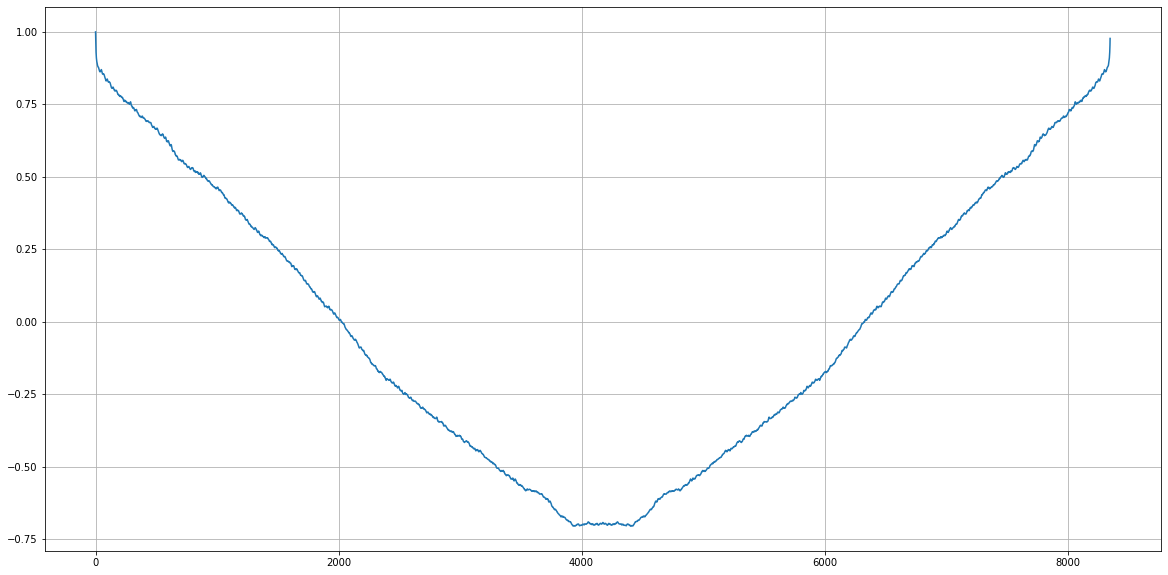

In [83]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(p1)

In [89]:
print(p[0:20])
print(p1[0:20])

[1.         0.97748794 0.95519097 0.94073746 0.93043858 0.92230363
 0.91570879 0.91001019 0.90538004 0.90087454 0.89826517 0.89579237
 0.8936297  0.89090655 0.88775114 0.88476648 0.88339371 0.88285417
 0.88213589 0.88121279]
[1.0000000000000022, 0.977487941428337, 0.9551909672744219, 0.9407374568544596, 0.9304385807475216, 0.9223036286910453, 0.9157087947990821, 0.910010194301464, 0.9053800411963051, 0.9008745431629821, 0.8982651727535854, 0.8957923720743213, 0.8936296957020808, 0.8909065548130157, 0.88775114450248, 0.8847664809367678, 0.8833937093402986, 0.8828541746881439, 0.8821358860607758, 0.8812127935741308]


In [9]:
def circular_autocorrelation_3(timeseries):
    '''performs circular autocorrelation on timeseries'''
    
    np.correlate(timeseries, timeseries, )
    variance = np.var(timeseries)
    mean = np.mean(timeseries)
    

array([[2.5, 2.5],
       [2.5, 2.5]])

array([ 4.5, 12. , 21. , 12. ,  4.5])

,0,1
0,1.000000,0.882136
1,0.882136,1.000000


In [112]:
autocorelation = [pd.Series(full_cpu[0]).autocorr(n) for n in range(len(full_cpu[0]))]

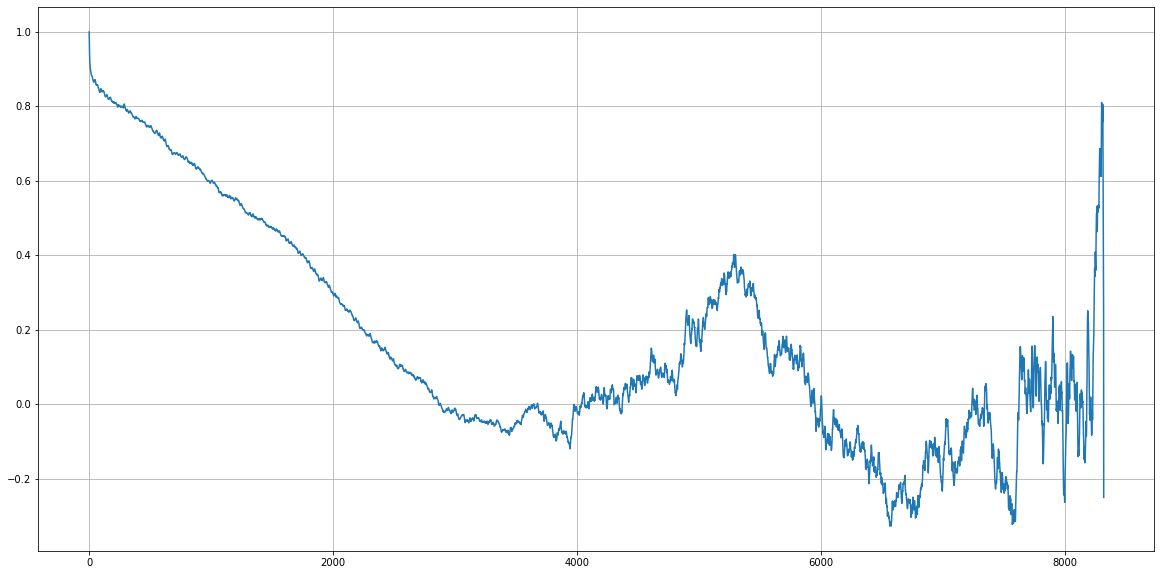

In [113]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(autocorelation)

In [108]:
print(p[0:20])
print(p1[0:20])

[1.         0.97748794 0.95519097 0.94073746 0.93043858 0.92230363
 0.91570879 0.91001019 0.90538004 0.90087454 0.89826517 0.89579237
 0.8936297  0.89090655 0.88775114 0.88476648 0.88339371 0.88285417
 0.88213589 0.88121279]
[1.0000000000000022, 0.977487941428337, 0.9551909672744219, 0.9407374568544596, 0.9304385807475216, 0.9223036286910453, 0.9157087947990821, 0.910010194301464, 0.9053800411963051, 0.9008745431629821, 0.8982651727535854, 0.8957923720743213, 0.8936296957020808, 0.8909065548130157, 0.88775114450248, 0.8847664809367678, 0.8833937093402986, 0.8828541746881439, 0.8821358860607758, 0.8812127935741308]


In [4]:
import pandas as pd
a = [1,1,1,1,1]
b = [2,2,2,2,2]
c = [3,3,3,3,3]
d = [4,4,4,4,4]
e = [5,5,5,5,5]
f = [2,5,7,8,0]

temp = [a,b,c,d,e]
k = pd.DataFrame(temp, index = f, columns = f)

In [5]:
k

,2,5,7,8,0
2,1,1,1,1,1
5,2,2,2,2,2
7,3,3,3,3,3
8,4,4,4,4,4
0,5,5,5,5,5


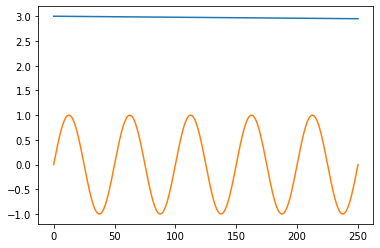

In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.arange(0, 5.02, 0.02).tolist()

def sineing(x):
    return (math.sin(2*(math.pi)*x))

def sineing1(x):
    return (5*(math.sin(2*(math.pi)*x)))
# a = list(map(sineing1, x))
a = a = list(map(linear, x))
b = list(map(sineing, x))

plt.plot(a)
plt.plot(b)

In [38]:
import pandas as pd
df = pd.DataFrame({0: a, 1: b})
df.corr()

,0,1
0,1.000000,0.154806
1,0.154806,1.000000


100


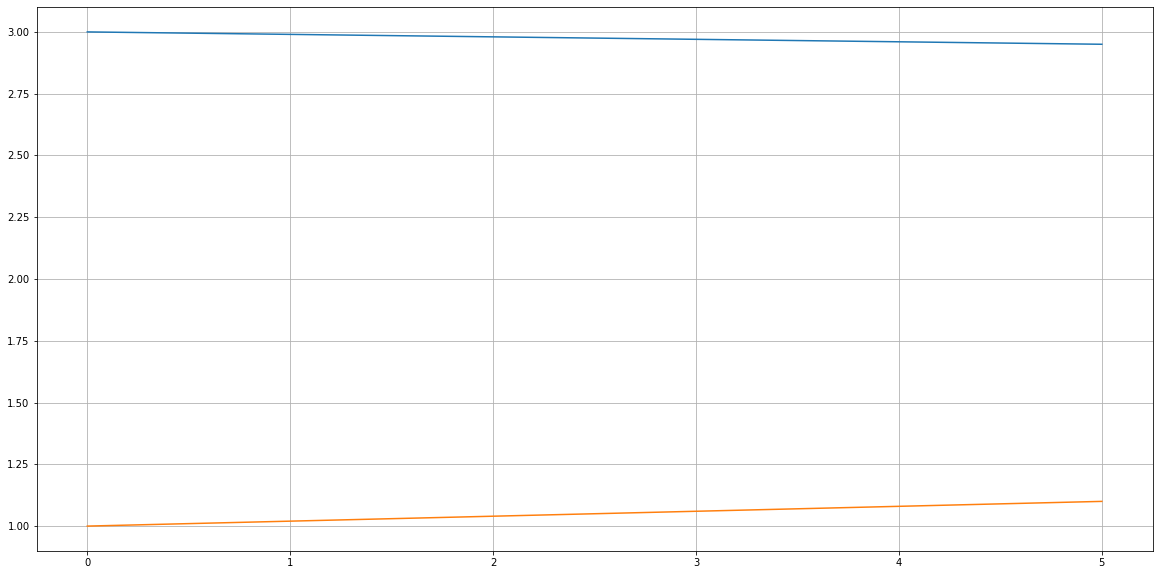

In [32]:
x = np.arange(0, 5.02, 0.02).tolist()
print(x.index(2))
def linear(x):
    return (-0.01*x + 3)

def linear1(x):
    return (0.02*x + 1)

a = list(map(linear, x))
b = list(map(linear1, x))

plt.figure(figsize=(20,10))
plt.grid()
plt.plot(x, a)
plt.plot(x, b)

In [33]:
df = pd.DataFrame({0: a, 1: b})
df.corr()

,0,1
0,1.0,-1.0
1,-1.0,1.0


In [19]:
from scipy import spatial
result = 1 - spatial.distance.cosine(a, b)

In [20]:
result

0.981554260146936